# **TASK 1** - Exploratory Data Analysis

**KEYWORDS**
>cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

data = pd.read_csv("/content/drive/MyDrive/ML_DataSets/mushrooms.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [63]:
data.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [64]:
type(data)

pandas.core.frame.DataFrame

In [65]:
data.shape

(8124, 23)

In [66]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [68]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [69]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

**Question 1**
>Visualize distribution of class , cap-shape , cap-color , cap-surface of mushroom varieties.

e    4208
p    3916
Name: class, dtype: int64


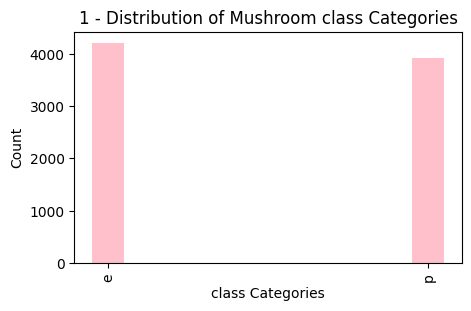

In [70]:
class_counts = data['class'].value_counts()
print(class_counts)
plt.figure(figsize=(5,3))
plt.bar(class_counts.index, class_counts.values, color='pink', width=0.1)

plt.xlabel('class Categories')
plt.ylabel('Count')
plt.title('1 - Distribution of Mushroom class Categories')
plt.xticks(rotation='vertical')
plt.show()

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64


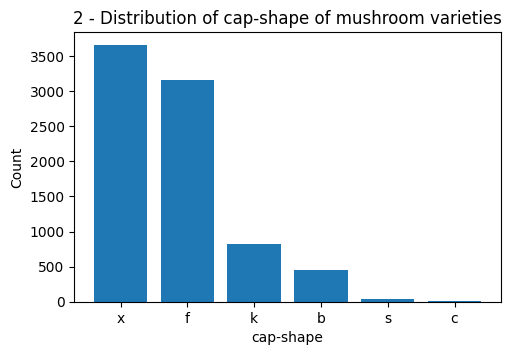

In [71]:
column_counts = data['cap-shape'].value_counts()
print(column_counts)
plt.figure(figsize=(5.5, 3.5))
plt.bar(column_counts.index,column_counts.values)
plt.title('2 - Distribution of cap-shape of mushroom varieties')
plt.xlabel('cap-shape')
plt.ylabel('Count')
plt.show()

n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64


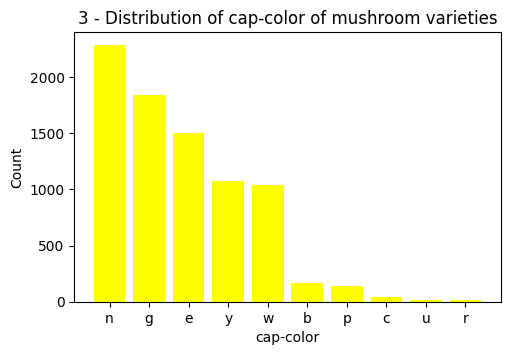

In [72]:
column_counts = data['cap-color'].value_counts()
print(column_counts)
plt.figure(figsize=(5.5,3.5))
plt.bar(column_counts.index,column_counts.values,color="Yellow")
plt.title('3 - Distribution of cap-color of mushroom varieties')
plt.xlabel('cap-color')
plt.ylabel('Count')
plt.show()

y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64


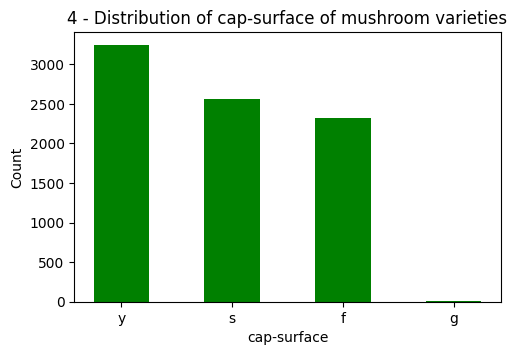

In [73]:
column_counts = data['cap-surface'].value_counts()
print(column_counts)
plt.figure(figsize=(5.5,3.5))
plt.bar(column_counts.index,column_counts.values,color="green",width=0.5)
plt.title('4 - Distribution of cap-surface of mushroom varieties')
plt.xlabel('cap-surface')
plt.ylabel('Count')
plt.show()

These graphs provide insights into the distribution of specific characteristics (class, cap shape, cap color, cap surface) within the mushroom dataset, allowing for a better understanding of the dataset's composition. For example the fisrt graph shows the distribution of poisonous and edible mushrooms which are more or less same in number. Similarly other graphs shows distribution of other characterstics

**Question 2**
>Find relation between gill-size and gill spacing.

In [74]:
from scipy.stats import chi2_contingency

# Extract the columns from the dataset
gill_spacing = data['gill-spacing']
gill_size = data['gill-size']

# Create a cross-tabulation
cross_tab = pd.crosstab(gill_spacing,gill_size)
print(cross_tab)

# Perform the chi-square test
chi2, p_value, _, _ = chi2_contingency(cross_tab)
print(p_value)

gill-size        b     n
gill-spacing            
c             4556  2256
w             1056   256
2.206873949766849e-22


While finding the relation between gill spacing and gill size, we found that as the p value is less than 0.05 so we can say that there is a statistically significant relationship between gill spacing and gill size

**Question 3**
>Do a analysis over the stalk of mushroom

<ipython-input-75-2675a87f5c1d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix =df.corr()
<ipython-input-75-2675a87f5c1d>:5: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  heatmap = plt.imshow(correlation_matrix, cmap='YlGnBu')
<ipython-input-75-2675a87f5c1d>:5: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  heatmap = plt.imshow(correlation_matrix, cmap='YlGnBu')


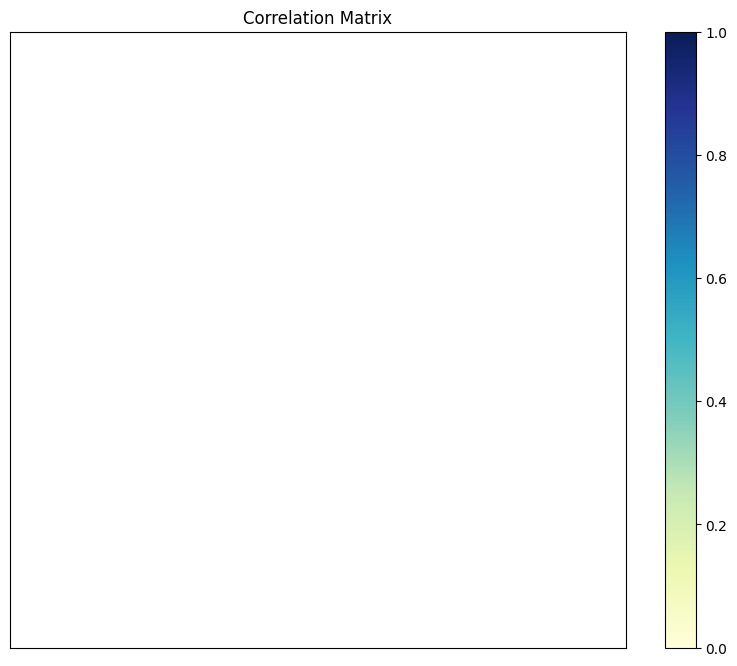

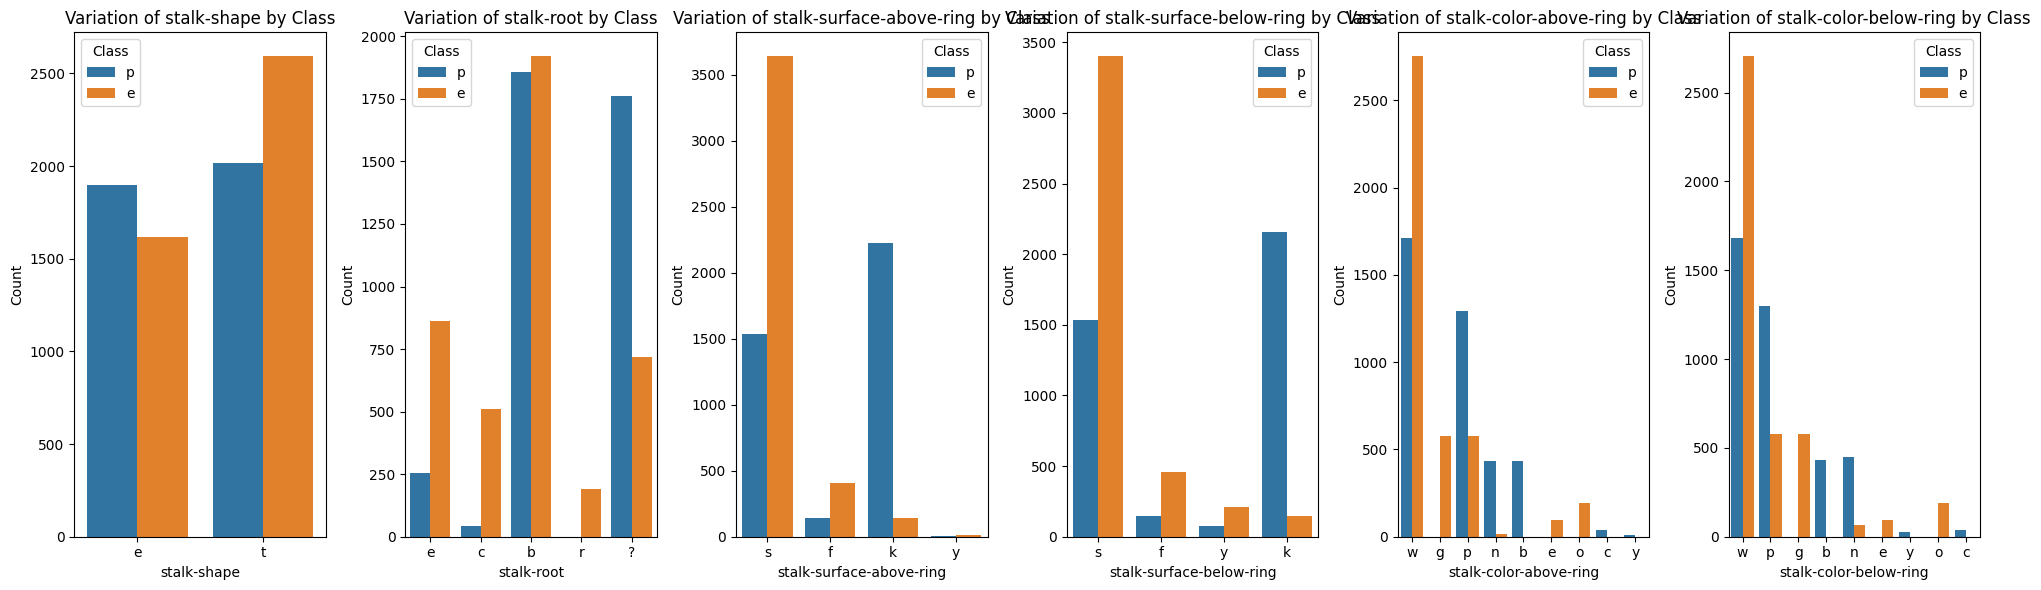

In [75]:
selected_columns = ['stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring']
df = data[selected_columns]
correlation_matrix =df.corr()
plt.figure(figsize=(10,8))
heatmap = plt.imshow(correlation_matrix, cmap='YlGnBu')
cbar = plt.colorbar(heatmap)
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns)

plt.title("Correlation Matrix")
plt.show()



#Using a different approach for comparison
fig, axes = plt.subplots(nrows=1, ncols=len(selected_columns), figsize=(20,6))

for i, column in enumerate(selected_columns):
    sns.countplot(data=data, x=column, hue='class', ax=axes[i])
    axes[i].set_title(f"Variation of {column} by Class")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Count")
    axes[i].legend(title="Class")

plt.tight_layout()
plt.show()

The first presented correlation mattrix shows that the stalk realted columns have least variations which results in an empty plot. Later, using the matplotlib library, the different stalk features like stalk-root, stalk-shape, stalk-surface above and below ring and stalk-color above and below the ring have been compared.


**Question 4**
>Which plot will be the best to show relation between color and class of mushroom

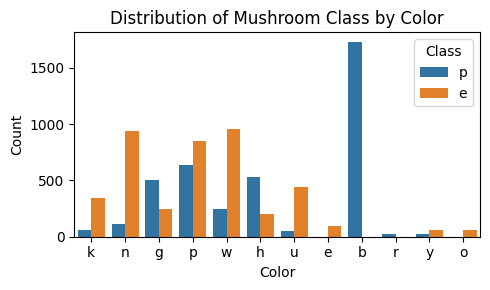

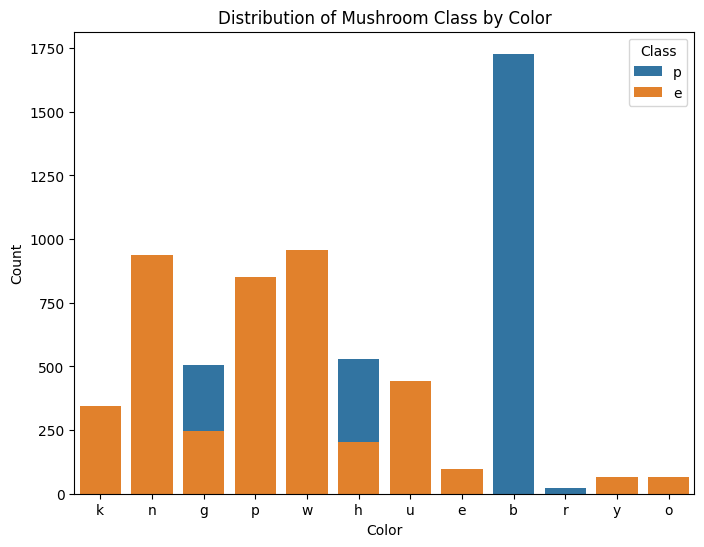

In [79]:
plt.figure(figsize=(5,3))
sns.countplot(data=data, x='gill-color', hue='class')
plt.title("Distribution of Mushroom Class by Color")
plt.xlabel("Color")
plt.ylabel("Count")
plt.legend(title="Class")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='gill-color', hue='class', dodge=False)
plt.title("Distribution of Mushroom Class by Color")
plt.xlabel("Color")
plt.ylabel("Count")
plt.legend(title="Class")
plt.show()

A stacked bar plot is a better approach for displaying the relation between class and color. Similarly, we can use the bar plot for other color characterstics like veil-solor, gill-color, cap-color, stalk-color-above-ring, stalk-color-below-ring and spore print color

**Question 5**
>Find a relation between population and Habitat of Mushroom

In [80]:
from scipy.stats import chi2_contingency
population = data['population']
habitat = data['habitat']
cross_tab = pd.crosstab(population,habitat)
print(cross_tab)

# Perform the chi-square test
chi2, p_value, _, _ = chi2_contingency(cross_tab)
print(p_value)

habitat        d    g    l    m    p    u    w
population                                    
a              0  384    0    0    0    0    0
c             36    0  112    0    0    0  192
n              0  272    0  128    0    0    0
s             96  840    0  128   48  136    0
v           1904  388  720   36  808  184    0
y           1112  264    0    0  288   48    0
0.0


While finding the relation between population and habitat of ushroom Classification, we found that as the p value is less than 0.05 so we can say that there is a statistically significant relationship between population and habitat

# **TASK 2** - Extension of EDA task - Classification/Regression

Perform following steps on the same dataset which you used for EDA.
> - Data Preprocessing (as per requirement)
> - Feature Engineering
> - Split dataset in train-test (80:20 ratio)
> - Model selection
> - Model training
> - Model evaluation
> - Fine-tune the Model
> - Make predictions

Summarize your model's performance by evaluation metrices

Mushroom classification is typically considered a classification problem rather than a regression problem because the goal is to predict the discrete class or category of a mushroom based on its features. In this case, the task is to determine whether a mushroom is edible or poisonous.

Classification problems involve assigning input data to predefined categories or classes. In the case of mushroom classification, the target variable is categorical, consisting of two classes: edible or poisonous. The features or attributes of the mushrooms, such as cap shape, cap color, gill color, etc., are used as input variables to predict the class label.

On the other hand, regression problems involve predicting a continuous or numerical value. For example, if the goal was to predict the size or weight of a mushroom based on its features, it would be a regression problem.

**Hence it is a classification problem**

In [81]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,confusion_matrix

In [85]:
from sklearn import preprocessing
x = data.drop(['class'], axis = 1)
y = data['class']
label_encoder = preprocessing.LabelEncoder()
for column in x.columns:
    x[column] = label_encoder.fit_transform(x[column])
y = label_encoder.fit_transform(y)

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [95]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

**MODEL - DECISION TREE CLASSIFICATION ALGORITHM**

In [96]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [98]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
ac=accuracy_score(y_test,y_pred)
print(ac*100)

[[852   0]
 [  0 773]]
100.0


Predicting using the model built

In [102]:
sample_data = [[5, 1, 2, 0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1]]
sample_pred = classifier.predict(sample_data)
print("Predicted Class:", sample_pred)

Predicted Class: [1]



**The decision tree algorithm used for determining mushroom classification achieved a remarkable accuracy of 100%. This implies that the model was able to accurately classify all the mushrooms in the dataset without any misclassifications**